In [34]:
from sklearn.datasets import make_regression

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [36]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

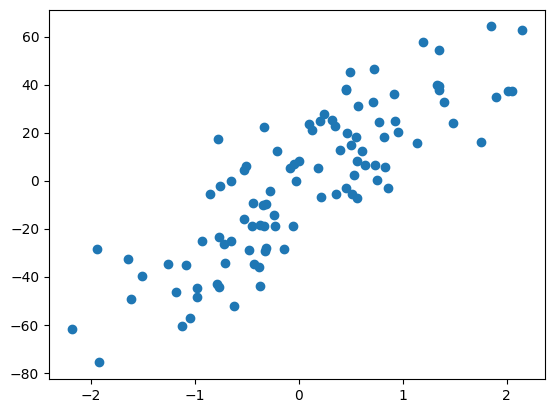

In [37]:
plt.scatter(X,y)

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr=LinearRegression()

In [54]:
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
print(lr.coef_)

[28.67684216]


In [56]:
print(lr.intercept_)

-2.088699766134101


In [61]:
y_pred=lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.71337703667083

In [62]:
np.mean(cross_val_score(lr,X_train,y_train,scoring='r2',cv=10))

np.float64(0.5075405350798442)

In [45]:
class GDRegressor:

  def __init__(self,learning_rate,epochs):
      self.m_ =100
      self.b_=-120
      self.lr =learning_rate
      self.epochs=epochs
  def fit(self,X,y):
      #calcultnig  by using
      for i in range(self.epochs):
          loss_slope_b =-2*np.sum(y-self.m_*X.ravel()-self.b_)
          loss_slope_m =-2*np.sum((y-self.m_*X.ravel()-self.b_)*X.ravel())
          self.b_ =self.b_ -(self.lr*loss_slope_b)
          self.m_ =self.m_ -(self.lr*loss_slope_m)
          print(self.m_,self.b_)
  def predict(self,X):
      return self.m_*X +self.b_

In [46]:
gd =GDRegressor(0.001,100)
gd.fit(X,y)

88.7901778060777 -97.30202349511147
79.26989400677363 -79.01269499728718
71.19603915550572 -64.2700212110887
64.357826042914 -52.381567622457695
58.573134285938856 -42.79092431395032
53.685100591058074 -35.05083591632167
49.55898969983806 -28.80166573902754
46.07935938462746 -23.754130522644466
43.14751810732243 -19.6754551237646
40.679264258689464 -16.378266564607884
38.602889878179504 -13.711682863685132
36.85742837440565 -11.55416078082497
35.391124246007365 -9.807753543980294
34.160102562818395 -8.393499154751025
33.12721658147269 -7.2477154903755485
32.2610530264308 -6.3190229237706514
31.53507604240516 -5.5659507997754325
30.926892458014258 -4.955012616245335
30.417622682493505 -4.459157586120731
29.991363212652477 -4.056524538225423
29.63472830753753 -3.7294387591921634
29.33645986404345 -3.4636041130856206
29.087095882238803 -3.2474521798712006
28.87868913818444 -3.071617693375023
28.70456878480573 -2.928515605334555
28.559138582490913 -2.811999951784896
28.437706327772243 -2.7

In [47]:
gd.predict(X)

array([[-22.11921769],
       [-14.45967436],
       [-14.92180785],
       [ 24.22071289],
       [  4.32438488],
       [ 21.67112435],
       [ -9.06605019],
       [  2.851948  ],
       [-22.35879005],
       [-14.25796038],
       [ 53.78500537],
       [  8.75972323],
       [  3.48793408],
       [ -8.76271341],
       [-23.68416824],
       [ 10.31579463],
       [ 15.5120051 ],
       [  7.71035286],
       [-47.24011768],
       [ 46.38331635],
       [-24.25080397],
       [-16.54175657],
       [-28.12854285],
       [ 57.54630988],
       [ -8.06489135],
       [-47.90758693],
       [-11.71784478],
       [-11.25883162],
       [-15.69039288],
       [-16.85340673],
       [ 17.79616505],
       [ 19.01909815],
       [ 10.32476716],
       [-37.40283105],
       [-63.15798965],
       [-35.28268842],
       [  3.75651986],
       [ 34.72543668],
       [-32.54893408],
       [ 13.35192552],
       [-44.39433775],
       [ -2.36122692],
       [-10.03469777],
       [ 10

In [63]:
y_pred=gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7212161460421884

In [64]:
m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)


In [76]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x = m_arr, y = b_arr, z =z_arr)])

fig.update_layout(title='Cost Function', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))



fig.show()

fig.write_html("cost_function.html")


In [66]:
b = 150
m = -127.82
lr = 0.001
all_b = []
all_m = []
all_cost = []
epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)



In [75]:
import plotly.express as px

fig = px.scatter_3d(x=np.array(all_m).ravel(), y=np.array(all_b).ravel(), z=np.array(all_cost).ravel()*100)

fig.add_trace(go.Surface(x = m_arr, y = b_arr, z =z_arr*100 ))

fig.show()

fig.write_html("cost_function2.html")


In [69]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(x=np.array(all_m).ravel(), y=np.array(all_b).ravel(), name='High 2014',
                         line=dict(color='#fff', width=4)))

fig.add_trace(go.Contour(z=z_arr,x=m_arr,y=b_arr))
fig.show()

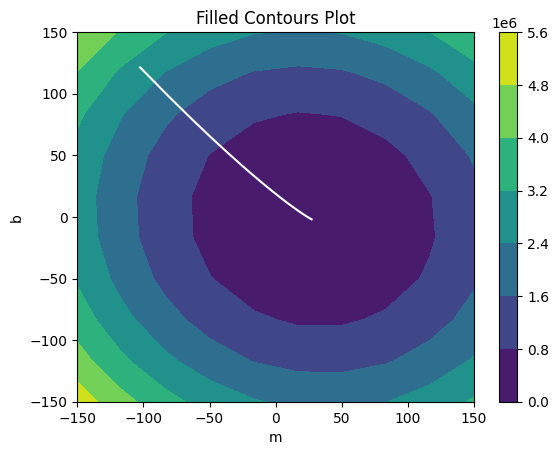

<Figure size 1800x400 with 0 Axes>

In [70]:
import numpy as np
import matplotlib.pyplot as plt


fig,ax=plt.subplots(1,1)
plt.figure(figsize=(18,4))
cp = ax.contourf(m_arr, b_arr, z_arr)
ax.plot(np.array(all_m).ravel(),np.array(all_b).ravel(),color='white')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()


In [77]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim =(-150, 150), ylim =(-150, 150))

axis.contourf(m_arr, b_arr, z_arr)

line, = axis.plot([], [], lw = 2,color='white')

xdata, ydata = [], []

# animation function
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(all_m[i])
    ydata.append(all_b[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(label)

    return line,

# calling the animation function
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

#f = r"animation8.gif"
#writergif = animation.PillowWriter(fps=2)
#anim.save(f, writer=writergif)
plt.show()

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.

